In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming df is your DataFrame containing columns y_val and y_pred_rnd
df_res = pd.read_csv('predict.csv')
y_val = df_res['y_val'].to_list()
y_pred_rnd = df_res['y_pred_rnd'].to_list()



[1. 2. 3. 4. 5. 6.]


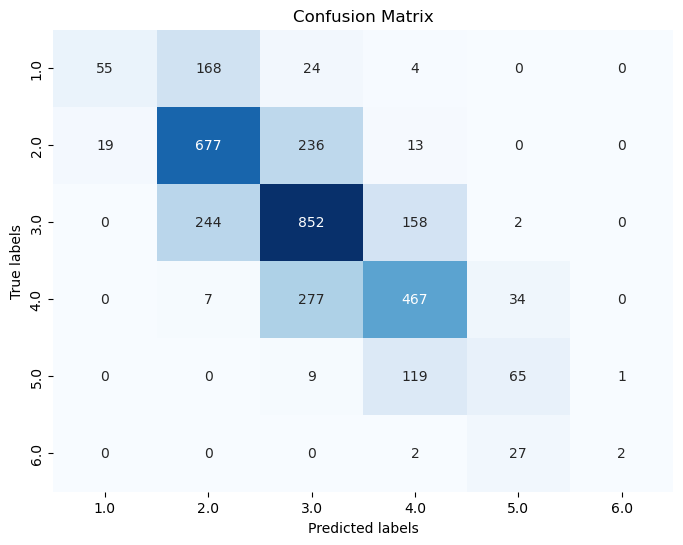

In [2]:
# Calculate confusion matrix
classes = np.unique(np.concatenate((y_val, y_pred_rnd)))
print(classes)
conf_matrix = confusion_matrix(y_val, y_pred_rnd)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [11]:
from sklearn.metrics import matthews_corrcoef, accuracy_score

def calculate_accuracy_per_class(y_val, y_pred):
    # Get the confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    
    # Initialize a list to store accuracy for each class
    accuracy_per_class = []
    
    # Iterate over each class
    for i in range(len(cm)):
        # Calculate accuracy for the current class
        class_accuracy = cm[i, i] / cm[i].sum()
        accuracy_per_class.append(class_accuracy)
    
    return accuracy_per_class


def calculate_metrics(y_val, y_pred):
    #mcc = matthews_corrcoef(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    return mcc, accuracy


mcc, accuracy = calculate_metrics(y_val, y_pred_rnd)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Accuracy:", accuracy)


Matthews Correlation Coefficient (MCC): 0.6666666666666666
Accuracy: 0.6117850953206239
